In [1]:
import os
import shutil

import glob
import numpy as np

import tarfile

In [2]:
TARGET_PATH = "./data"

len(os.listdir(TARGET_PATH)) # 강아지 종류

120

In [3]:
# 파일 이름 변경
for dir_name in os.listdir(TARGET_PATH):
    breed_name = dir_name.split('-')[-1].lower()

    source_dir = os.path.join(TARGET_PATH, dir_name)
    target_dir = os.path.join(TARGET_PATH, breed_name)
    
    shutil.move(source_dir, target_dir) # source_dir파일을 target_dir로 이름 변경

In [18]:
dataset = []

for filepath in glob.iglob(f'{TARGET_PATH}/**/*.jpg', recursive=True): # TARGET_PATH 기준 모든 하위 디렉토리에서 해당 확장자 파일을 검출하고 싶을 때
    breed_name = filepath.split('/')[2]
    dataset.append([filepath, breed_name])
dataset = np.array(dataset)

In [19]:
dataset

array([['./data/collie/n02106030_16370.jpg', 'collie'],
       ['./data/collie/n02106030_14089.jpg', 'collie'],
       ['./data/collie/n02106030_16162.jpg', 'collie'],
       ...,
       ['./data/french_bulldog/n02108915_5667.jpg', 'french_bulldog'],
       ['./data/french_bulldog/n02108915_3527.jpg', 'french_bulldog'],
       ['./data/french_bulldog/n02108915_4066.jpg', 'french_bulldog']],
      dtype='<U75')

In [5]:
from sklearn.model_selection import train_test_split

In [20]:
# stratify : 지정한 Data의 비율을 유지, 
# label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할
train_val_image, test_image, train_val_target, test_target = train_test_split(dataset[:,0], dataset[:,1], stratify=dataset[:,1], test_size=0.2)
train_image, val_image, train_target, val_target = train_test_split(dataset[:,0], dataset[:,1], stratify=dataset[:,1], test_size=0.2)

In [21]:
train_target.shape, val_target.shape, test_target.shape

((16464,), (4116,), (4116,))

In [22]:
import pandas as pd

In [25]:
pd.Series(val_target).value_counts() #/ len(train_target)

coated_retriever          61
maltese_dog               51
afghan_hound              48
scottish_deerhound        46
irish_wolfhound           44
                          ..
doberman                  30
dhole                     30
welsh_springer_spaniel    30
rottweiler                30
clumber                   30
Length: 119, dtype: int64

train과 test 폴더를 나눠서 진행

In [29]:
DATA_PATH = './data'

if os.path.exists(DATA_PATH):
    # os.mkdir(DATA_PATH) # 단일 폴더만 생성 가능
    os.makedirs(os.path.join(DATA_PATH, 'train')) # 폴더를 여러개 만들기 가능
    os.makedirs(os.path.join(DATA_PATH, 'val'))
    os.makedirs(os.path.join(DATA_PATH, 'test'))

    for breed_name in set(test_target):
        os.makedirs(os.path.join(DATA_PATH, 'train', breed_name))
        os.makedirs(os.path.join(DATA_PATH, 'val', breed_name))
        os.makedirs(os.path.join(DATA_PATH, 'test', breed_name))

In [30]:
for filepath, target_dir in zip(train_image.tolist(), train_target.tolist()):
    filename = filepath.split('/')[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH, 'train', target_dir, filename)
    print(source_path, '---------',target_dir)
    shutil.copy(source_path, target_dir) # shutil.copy(복사할 파일, 복사위치+파일명)


./data/bloodhound/n02088466_11623.jpg --------- ./data/train/bloodhound/n02088466_11623.jpg
./data/great_pyrenees/n02111500_6387.jpg --------- ./data/train/great_pyrenees/n02111500_6387.jpg
./data/siberian_husky/n02110185_7888.jpg --------- ./data/train/siberian_husky/n02110185_7888.jpg
./data/sussex_spaniel/n02102480_4923.jpg --------- ./data/train/sussex_spaniel/n02102480_4923.jpg
./data/old_english_sheepdog/n02105641_534.jpg --------- ./data/train/old_english_sheepdog/n02105641_534.jpg
./data/ibizan_hound/n02091244_5769.jpg --------- ./data/train/ibizan_hound/n02091244_5769.jpg
./data/cairn/n02096177_7574.jpg --------- ./data/train/cairn/n02096177_7574.jpg
./data/staffordshire_bullterrier/n02093256_14933.jpg --------- ./data/train/staffordshire_bullterrier/n02093256_14933.jpg
./data/tibetan_terrier/n02097474_8609.jpg --------- ./data/train/tibetan_terrier/n02097474_8609.jpg
./data/shetland_sheepdog/n02105855_13955.jpg --------- ./data/train/shetland_sheepdog/n02105855_13955.jpg
./da

In [31]:
for filepath, target_dir in zip(val_image.tolist(), val_target.tolist()):
    filename = filepath.split('/')[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH, 'val', target_dir, filename)
    print(source_path, target_dir)
    shutil.copy(source_path, target_dir)

./data/norwegian_elkhound/n02091467_6955.jpg ./data/val/norwegian_elkhound/n02091467_6955.jpg
./data/airedale/n02096051_6755.jpg ./data/val/airedale/n02096051_6755.jpg
./data/standard_poodle/n02113799_1696.jpg ./data/val/standard_poodle/n02113799_1696.jpg
./data/english_foxhound/n02089973_533.jpg ./data/val/english_foxhound/n02089973_533.jpg
./data/basset/n02088238_3066.jpg ./data/val/basset/n02088238_3066.jpg
./data/tzu/n02086240_7093.jpg ./data/val/tzu/n02086240_7093.jpg
./data/tzu/n02086240_3137.jpg ./data/val/tzu/n02086240_3137.jpg
./data/irish_setter/n02100877_4895.jpg ./data/val/irish_setter/n02100877_4895.jpg
./data/afghan_hound/n02088094_7636.jpg ./data/val/afghan_hound/n02088094_7636.jpg
./data/irish_terrier/n02093991_863.jpg ./data/val/irish_terrier/n02093991_863.jpg
./data/airedale/n02096051_3981.jpg ./data/val/airedale/n02096051_3981.jpg
./data/chesapeake_bay_retriever/n02099849_1837.jpg ./data/val/chesapeake_bay_retriever/n02099849_1837.jpg
./data/labrador_retriever/n02099

In [32]:
for filepath, target_dir in zip(test_image.tolist(), test_target.tolist()):
    filename = filepath.split('/')[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH, 'test', target_dir, filename)
    print(source_path, target_dir)
    shutil.copy(source_path, target_dir)


./data/great_pyrenees/n02111500_5812.jpg ./data/test/great_pyrenees/n02111500_5812.jpg
./data/italian_greyhound/n02091032_3213.jpg ./data/test/italian_greyhound/n02091032_3213.jpg
./data/briard/n02105251_6161.jpg ./data/test/briard/n02105251_6161.jpg
./data/redbone/n02090379_2066.jpg ./data/test/redbone/n02090379_2066.jpg
./data/walker_hound/n02089867_2388.jpg ./data/test/walker_hound/n02089867_2388.jpg
./data/saint_bernard/n02109525_243.jpg ./data/test/saint_bernard/n02109525_243.jpg
./data/afghan_hound/n02088094_12945.jpg ./data/test/afghan_hound/n02088094_12945.jpg
./data/schipperke/n02104365_9143.jpg ./data/test/schipperke/n02104365_9143.jpg
./data/bouvier_des_flandres/n02106382_1399.jpg ./data/test/bouvier_des_flandres/n02106382_1399.jpg
./data/miniature_poodle/n02113712_2107.jpg ./data/test/miniature_poodle/n02113712_2107.jpg
./data/maltese_dog/n02085936_7574.jpg ./data/test/maltese_dog/n02085936_7574.jpg
./data/bluetick/n02088632_3346.jpg ./data/test/bluetick/n02088632_3346.jpg


In [35]:
target_dir

'./data/dataset/test/shetland_sheepdog/n02105855_5012.jpg'

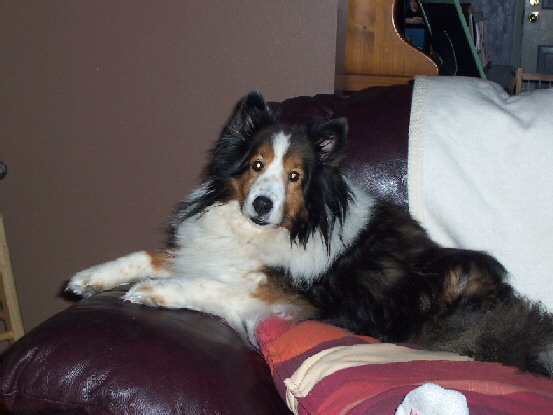

In [36]:
from PIL import Image # 이미지 다루기

im = Image.open(target_dir)
im

['tibetan_terrier' 'australian_terrier' 'leonberg' 'boxer'
 'yorkshire_terrier' 'affenpinscher' 'miniature_poodle' 'cardigan'
 'briard' 'blenheim_spaniel']


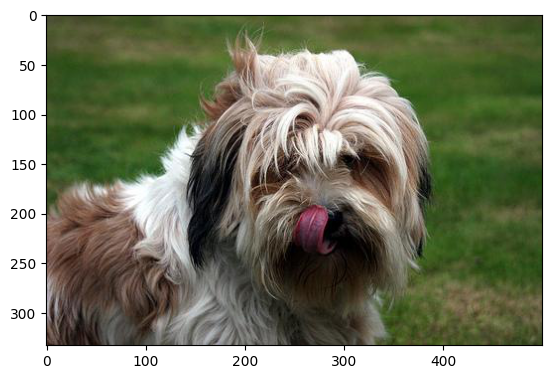

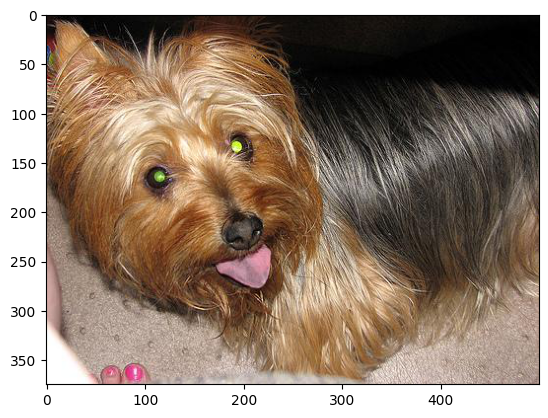

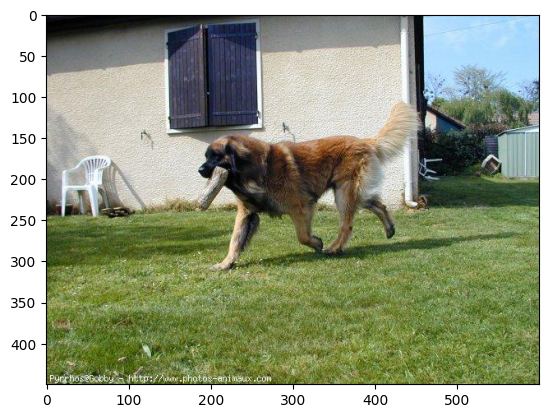

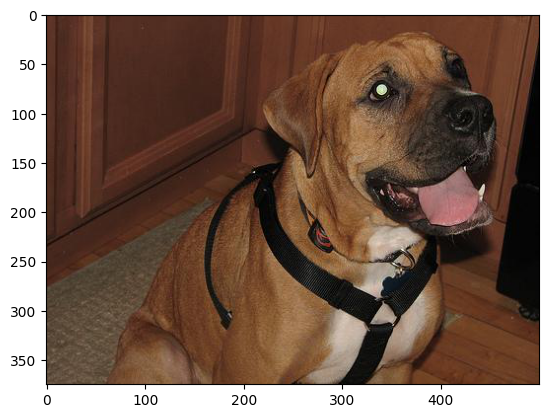

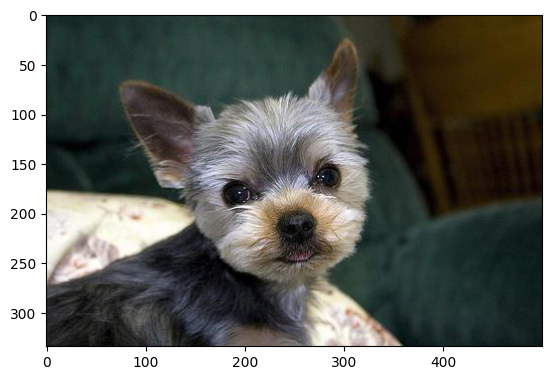

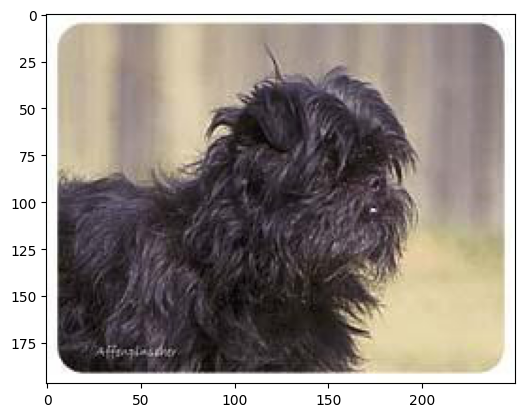

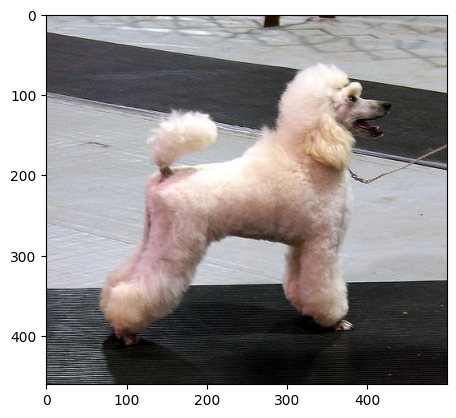

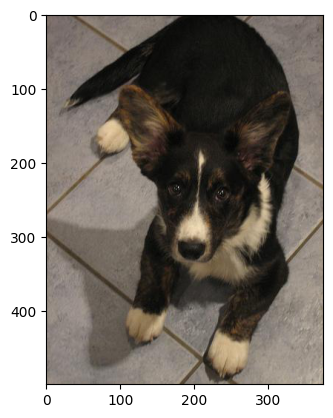

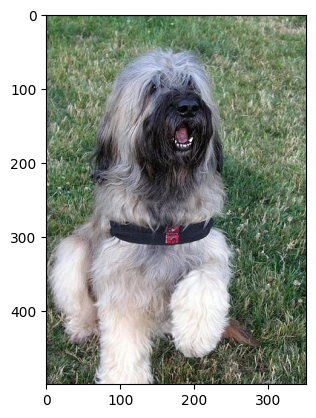

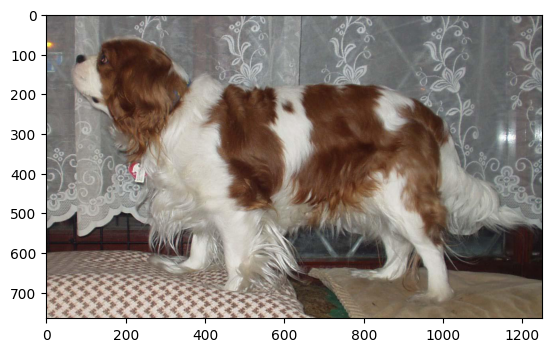

In [46]:
import matplotlib.image as mpimg

def process(filename: str = None) -> None:
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

idx = np.random.choice(len(dataset), 10)

images = dataset[:,0][idx]

for file in images:
    process(file)

print(dataset[:, 1][idx])

### Data 변형(augmentation에 쓰임)

In [47]:
from torchvision import datasets, transforms, models

In [48]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])
                                     ])


test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])
                                     ])


DATASET_PATH = './data/dataset/'
train_data = datasets.ImageFolder(DATASET_PATH + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(DATASET_PATH + '/test', transform=test_transforms)

In [49]:
import torch

train_loader = torch.utils.data.DataLoader(train_data, batch_size = 32, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 32, shuffle = True)

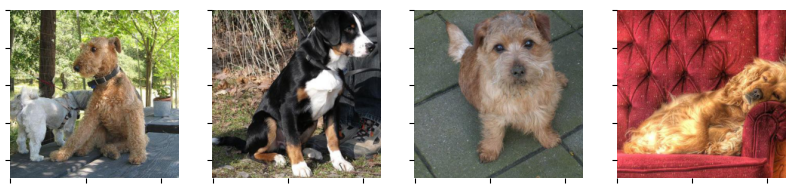

In [70]:
data_iter = iter(test_loader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for i in range(4):
    ax = axes[i]
    imshow(images[i], ax= ax, normalize=True)
